# Predicting Housing Prices In Boston

I aim to design a model that accurately predicts housing prices in Boston. This notebook explores techniques such as ordinary least squares, extra trees, and k-nearest neighbors. I use the highly-rated [USA Real Estate Dataset](https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset) by Ahmed Shahriar Sakib. This Kaggle dataset was produced by scraping [realtor.com](https://www.realtor.com/) and is regularly updated.

## 1. Data exploration

### 1.1 Loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('C:/Users/saina/Desktop/CS 365 V2/realtor-data.csv')

### 1.2 Summary statistics

In [3]:
df.head(10)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0


In [4]:
df.shape

(1401066, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401066 entries, 0 to 1401065
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1401066 non-null  object 
 1   bed             1184538 non-null  float64
 2   bath            1206853 non-null  float64
 3   acre_lot        1043599 non-null  float64
 4   city            1400875 non-null  object 
 5   state           1401066 non-null  object 
 6   zip_code        1400587 non-null  float64
 7   house_size      950954 non-null   float64
 8   prev_sold_date  714773 non-null   object 
 9   price           1400958 non-null  float64
dtypes: float64(6), object(4)
memory usage: 106.9+ MB


In [6]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,1.184538e+06,1.206853e+06,1.043599e+06,1.400587e+06,9.509540e+05,1.400958e+06
mean,3.392347e+00,2.487426e+00,3.215013e+01,8.356641e+03,2.178643e+03,8.186029e+05
std,2.051858e+00,1.873599e+00,1.249983e+03,4.130465e+03,3.492618e+03,2.683069e+06
min,1.000000e+00,1.000000e+00,0.000000e+00,6.010000e+02,4.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+00,1.200000e-01,5.652000e+03,1.170000e+03,2.350000e+05
50%,3.000000e+00,2.000000e+00,3.200000e-01,8.757000e+03,1.700000e+03,4.467770e+05
75%,4.000000e+00,3.000000e+00,1.340000e+00,1.142600e+04,2.500000e+03,7.950000e+05
max,1.230000e+02,1.980000e+02,1.000000e+05,9.999900e+04,1.450112e+06,8.750000e+08


In [7]:
df.describe(include = 'object')

,status,city,state,prev_sold_date
count,1401066,1400875,1401066,714773
unique,2,3512,19,10319
top,for_sale,New York City,New York,2022-04-15
freq,1399134,61299,653061,734


In [8]:
num_dups = df.duplicated().sum()
print(f'Found {num_dups} duplicated rows ({num_dups /len(df)*100:.2f}%).')

Found 1249026 duplicated rows (89.15%).


In [9]:
percents_missing = round(df.isna().sum()/len(df)*100, 2)
print('Percentage of Missing Data (%)')
percents_missing

Percentage of Missing Data (%)


status             0.00
bed               15.45
bath              13.86
acre_lot          25.51
city               0.01
state              0.00
zip_code           0.03
house_size        32.13
prev_sold_date    48.98
price              0.01
dtype: float64

### 1.3 Filter the data

In [10]:
df = df[(df['city'] == 'Boston') & (df['state'] == 'Massachusetts')]

In [11]:
df.head(10)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
100368,for_sale,1.0,1.0,NaN,Boston,Massachusetts,2132.0,708.0,1988-01-21,329000.0
100371,for_sale,1.0,1.0,0.02,Boston,Massachusetts,2135.0,688.0,2018-06-01,650000.0
100372,for_sale,2.0,1.0,0.03,Boston,Massachusetts,2130.0,1250.0,2007-08-30,739000.0
100373,for_sale,2.0,3.0,NaN,Boston,Massachusetts,2115.0,2226.0,NaN,4495000.0
100374,for_sale,9.0,3.0,0.09,Boston,Massachusetts,2131.0,3204.0,1998-08-06,1200000.0
100378,for_sale,3.0,3.0,0.06,Boston,Massachusetts,2130.0,2623.0,NaN,949000.0
100385,for_sale,NaN,1.0,NaN,Boston,Massachusetts,2135.0,568.0,NaN,560000.0
100386,for_sale,1.0,1.0,NaN,Boston,Massachusetts,2135.0,854.0,NaN,800000.0
100387,for_sale,2.0,1.0,NaN,Boston,Massachusetts,2135.0,887.0,NaN,888000.0
100388,for_sale,2.0,1.0,NaN,Boston,Massachusetts,2118.0,965.0,2021-03-31,1225000.0


In [12]:
df.shape

(31502, 10)

In [13]:
num_dups = df.duplicated().sum()
print(f'Found {num_dups} duplicated rows ({num_dups /len(df)*100:.2f}%).')

Found 30274 duplicated rows (96.10%).


In [14]:
percents_missing = round(df.isna().sum()/len(df)*100, 2)
print('Percentage of Missing Data (%)')
percents_missing

Percentage of Missing Data (%)


status             0.00
bed                5.00
bath               1.83
acre_lot          55.05
city               0.00
state              0.00
zip_code           0.00
house_size         1.40
prev_sold_date    60.29
price              0.00
dtype: float64

### 1.4 Dropping rows

One of the dataset's shortcomings is that it contains duplicate entries. The creator explains that his data collection process can resample the same property if it has been listed for the long time. This is problematic because overpriced homes tend to stay on the market for longer, and so they are likely overrepresented in this dataset. There is no way for us to identify which properties are unique. Thus, the simplest solution is to drop all duplicates.

In [15]:
df = df.drop_duplicates()
df.shape

(1228, 10)

In [16]:
total_missing = df.isna().sum()*100/len(df)
print('Percentage of Missing Data (%)')
total_missing

Percentage of Missing Data (%)


status             0.000000
bed                5.048860
bath               1.791531
acre_lot          55.700326
city               0.000000
state              0.000000
zip_code           0.000000
house_size         1.384365
prev_sold_date    60.830619
price              0.000000
dtype: float64

I am regressing over the number of bedrooms, bathrooms, and house size. This means data imputation is superfluous because the vast majority of rows are complete, which means that dropping incomplete rows is the most straightforward approach.

In [17]:
df = df.dropna(subset=['bed', 'bath', 'house_size'])
df.shape

(1166, 10)

In [18]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,1166.000000,1166.000000,515.000000,1166.000000,1166.000000,1.166000e+03
mean,3.102916,2.456261,4.530718,2129.089194,1833.052316,1.680617e+06
std,3.139073,2.152804,101.156560,31.929385,1784.709631,1.930530e+06
min,1.000000,1.000000,0.010000,2108.000000,335.000000,1.150000e+05
25%,2.000000,1.000000,0.020000,2116.000000,905.750000,6.750000e+05
50%,2.000000,2.000000,0.040000,2125.000000,1300.000000,9.490000e+05
75%,3.000000,3.000000,0.100000,2129.000000,2216.500000,1.800000e+06
max,60.000000,51.000000,2295.680000,2467.000000,38442.000000,2.000000e+07


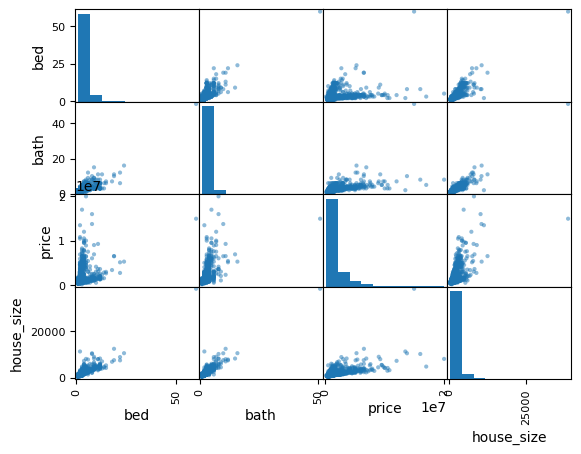

In [19]:
pd.plotting.scatter_matrix(df[['bed', 'bath', 'price', 'house_size']]) 
plt.show()

In [20]:
# Credit to the Kaggle user Ghifari Kusuma for this code block.
# https://www.kaggle.com/code/masghiff/predicting-housing-prices-eda-ml

def drop_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1

    return df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

df = drop_outliers(df, ['house_size'])

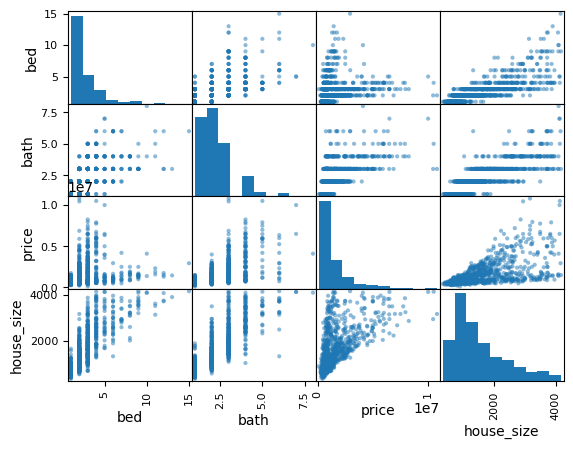

In [21]:
pd.plotting.scatter_matrix(df[['bed', 'bath', 'price', 'house_size']]) 
plt.show()

## 2 Model construction

Trial-and-error shows that dropping the extreme values results in worse model performance. This implies that exceptional values encode important information about the Boston housing market. Thus, I include them in the training data.

In [22]:
from sklearn.model_selection import train_test_split

X = df[['bed', 'bath', 'house_size']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def print_metrics(y_test, y_pred):
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('R^2:', r2_score(y_test, y_pred))

### 2.1 Ordinary Least Squares

In [24]:
from sklearn.linear_model import LinearRegression

model_ols = LinearRegression().fit(X_train, y_train)
y_pred = model_ols.predict(X_test)

print('Training Data:')
print_metrics(y_train, model_ols.predict(X_train))
print()
print('Testing Data:')
print_metrics(y_test, y_pred)

Training Data:
MSE: 816634322195.527
RMSE: 903678.2182810024
MAE: 591504.159360031
R^2: 0.6185548072423969

Testing Data:
MSE: 738317729958.2246
RMSE: 859254.1707540468
MAE: 596028.0599713444
R^2: 0.5373774045429143


In [25]:
coefficients = model_ols.coef_
intercept = model_ols.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: -191172.82155824266
Coefficients: [-583643.79594824  386621.01283381    1540.83763011]


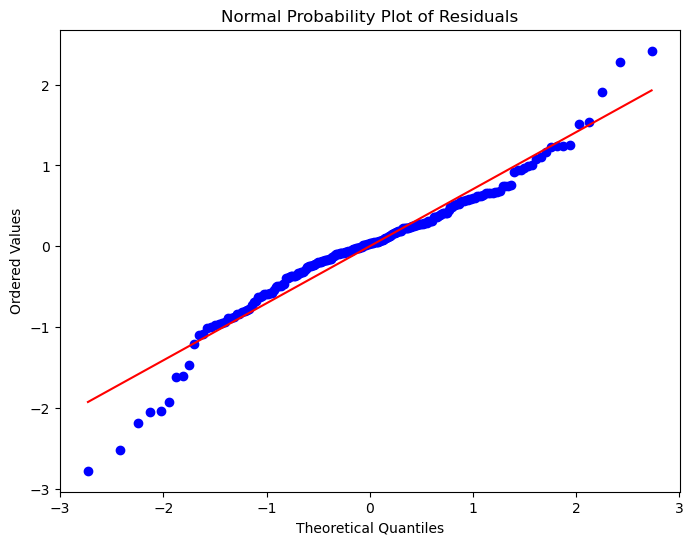

In [26]:
y_test_standardized = (y_test - np.mean(y_test)) / np.std(y_test)
y_pred_standardized = (y_pred - np.mean(y_pred)) / np.std(y_pred)

# Create normal probability plot
plt.figure(figsize=(8, 6))
stats.probplot(y_test_standardized - y_pred_standardized, dist="norm", plot=plt)
plt.title('Normal Probability Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

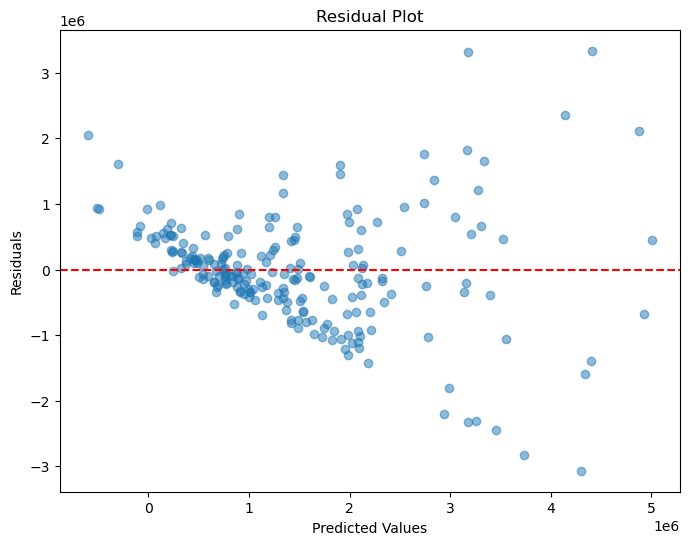

In [27]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### 2.2 Extra Trees

In [28]:
from sklearn.ensemble import ExtraTreesRegressor

model_ET = ExtraTreesRegressor().fit(X_train, y_train)
y_pred = model_ET.predict(X_test)

print('Training Data:')
print_metrics(y_train, model_ET.predict(X_train))
print()
print('Testing Data:')
print_metrics(y_test, y_pred)

Training Data:
MSE: 25553140601.242928
RMSE: 159853.497306887
MAE: 38233.94227828746
R^2: 0.9880642750650034

Testing Data:
MSE: 1134117292218.946
RMSE: 1064949.4317661033
MAE: 633401.7575190259
R^2: 0.2893733090917677


### 2.3 Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
y_pred = model_DT.predict(X_test)

print('Training Data:')
print_metrics(y_train, model_DT.predict(X_train))
print()
print('Testing Data:')
print_metrics(y_test, y_pred)

Training Data:
MSE: 25553140027.84843
RMSE: 159853.49551338697
MAE: 38232.79548929663
R^2: 0.9880642753328326

Testing Data:
MSE: 1299664563162.3953
RMSE: 1140028.3168248038
MAE: 628257.8523592086
R^2: 0.18564302462598736


### 2.4 Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Trial and error shows 70 estimators is sufficient
model_RF = RandomForestRegressor(n_estimators=67, random_state=0).fit(X_train, y_train)
y_pred = model_RF.predict(X_test)

print('Training Data:')
print_metrics(y_train, model_RF.predict(X_train))
print()
print('Testing Data:')
print_metrics(y_test, y_pred)

Training Data:
MSE: 114208141967.62991
RMSE: 337946.951410469
MAE: 207819.086564932
R^2: 0.9466540340721808

Testing Data:
MSE: 955280122146.0988
RMSE: 977384.3267344217
MAE: 579192.0121338789
R^2: 0.40143091305582557


### 2.5 KNN

In [31]:
from sklearn.neighbors import KNeighborsRegressor

model_KN = KNeighborsRegressor().fit(X_train, y_train)
y_pred = model_KN.predict(X_test)

print('Training Data:')
print_metrics(y_train, model_KN.predict(X_train))
print()
print('Testing Data:')
print_metrics(y_test, y_pred)

Training Data:
MSE: 1009372907580.8142
RMSE: 1004675.523530266
MAE: 607741.3084862386
R^2: 0.528527723080098

Testing Data:
MSE: 1461376147674.759
RMSE: 1208873.9171951553
MAE: 762842.2821917809
R^2: 0.08431614338365201


### 2.6 KNN with scaling

In [32]:
from sklearn.preprocessing import StandardScaler

df['house_size'] = StandardScaler().fit_transform(df['house_size'].values.reshape(len(df), 1))
df['price'] = StandardScaler().fit_transform(df['price'].values.reshape(len(df), 1))
df['bed'] = StandardScaler().fit_transform(df['bed'].values.reshape(len(df), 1))
df['bath'] = StandardScaler().fit_transform(df['bath'].values.reshape(len(df), 1))

X = df[['bed', 'bath', 'house_size']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_KN = KNeighborsRegressor().fit(X_train, y_train)
y_pred = model_KN.predict(X_test)

print('Training Data:')
print_metrics(y_train, model_KN.predict(X_train))
print()
print('Testing Data:')
print_metrics(y_test, y_pred)

Training Data:
MSE: 0.253058264650033
RMSE: 0.5030489684414758
MAE: 0.2990262179465669
R^2: 0.7598152959978083

Testing Data:
MSE: 0.4471670774939505
RMSE: 0.6687055237501411
MAE: 0.39177108851190945
R^2: 0.4306574161887644
